# POSTTEST 7 Praktikum Kercedasan Buatan
---
(*2109106063* - Zahra Salsabila - B121)

**Link dataset:** *https://www.kaggle.com/datasets/ndomalau/edelweis-flower/data*

# Import Library

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import os

# Menampilkan Sample Data Gambar

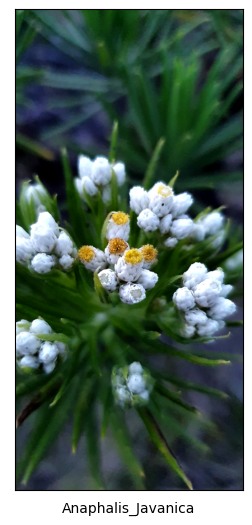

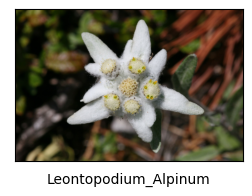

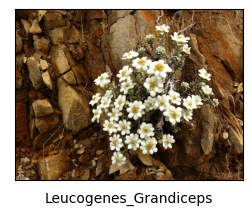

In [2]:
class_name = ['Anaphalis_Javanica', 'Leontopodium_Alpinum', 'Leucogenes_Grandiceps']

for i in range(3):
    # mengambil sample data gambar dari folder train
    nama_gambar = os.path.join('Edelweis/Train', class_name[i], class_name[i]+'_0.png')
    gambar = plt.imread(nama_gambar)
    plt.figure(figsize=(10,10))
    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gambar)
    plt.xlabel(class_name[i])
    plt.show()

# Preprocessing Data Gambar (Augmentasi Data)

In [3]:
img_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.1,
    rotation_range=5,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True, 
    vertical_flip=True,
    fill_mode='nearest'
)

# Split Data Menjadi train,val dan test

- File directory

In [4]:
train_dir = 'Edelweis/Train'
test_dir = 'Edelweis/Test'

- Split dataset ke dalam train

In [5]:
train_gen = img_datagen.flow_from_directory(
    train_dir,
    subset="training",
    seed=42,
    target_size=(128, 128),
    batch_size=16,
    shuffle = True,
    class_mode="categorical",
)

Found 3152 images belonging to 3 classes.


- Split dataset ke dalam validation

In [6]:
valid_gen = img_datagen.flow_from_directory(
    train_dir,
    subset="validation",
    seed=42,
    target_size=(128, 128),
    batch_size=16,
    shuffle = True,
    class_mode="categorical",
)

Found 348 images belonging to 3 classes.


- Split dataset ke dalam test 

In [7]:
test_gen = img_datagen.flow_from_directory(
    test_dir,
    seed=42,
    target_size=(128, 128),
    batch_size=16,
    shuffle = True,
    class_mode="categorical",
)

Found 1050 images belonging to 3 classes.


# Membuat Model Sequential

- Model

In [8]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(128, 128, 3)),
    Conv2D(16, (3,3), activation='relu' ),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

- Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

# Compiling model

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Fit Model
- Fungsi callback

In [11]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0, 
    mode='auto')

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,
    patience=5)

callbacks = [early_stopping_callback, lr_reducer]

- Fit model

In [12]:
model_fit = model.fit(
    train_gen,
    epochs = 10,
    validation_data = valid_gen,
    callbacks = callbacks,
    verbose = 1)

Epoch 1/10
197/197 [==============================] - 825s 4s/step - loss: 0.6832 - accuracy: 0.6780 - val_loss: 0.3540 - val_accuracy: 0.8649 - lr: 3.0000e-04
Epoch 2/10
197/197 [==============================] - 679s 3s/step - loss: 0.2315 - accuracy: 0.9162 - val_loss: 0.1356 - val_accuracy: 0.9598 - lr: 3.0000e-04
Epoch 3/10
197/197 [==============================] - 709s 4s/step - loss: 0.1184 - accuracy: 0.9588 - val_loss: 0.0597 - val_accuracy: 0.9741 - lr: 3.0000e-04
Epoch 4/10
197/197 [==============================] - 684s 3s/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.0425 - val_accuracy: 0.9856 - lr: 3.0000e-04
Epoch 5/10
197/197 [==============================] - 720s 4s/step - loss: 0.0758 - accuracy: 0.9721 - val_loss: 0.0738 - val_accuracy: 0.9684 - lr: 3.0000e-04
Epoch 6/10
197/197 [==============================] - 919s 5s/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 0.0669 - val_accuracy: 0.9770 - lr: 3.0000e-04
Epoch 7/10
197/197 [====================

# Evaluasi Model

In [17]:
loss, accuracy = model.evaluate(test_gen)
print("-------------------------------------------------")
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print("-------------------------------------------------")

66/66 [==============================] - 215s 3s/step - loss: 1.3400 - accuracy: 0.8076
-------------------------------------------------
Test loss: 1.3400468826293945
Test accuracy: 0.807619035243988
-------------------------------------------------


# Grafik Pergerakan Metrics

In [21]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_= model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

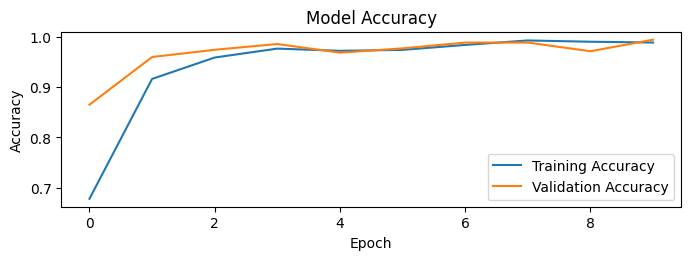

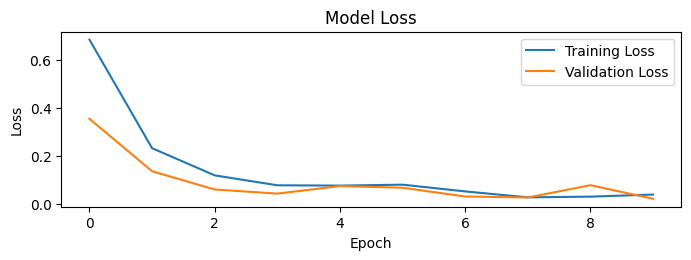

In [61]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 2)
plt.plot(loss_)
plt.plot(val_loss_)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()